KNN classification

In [25]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline



In [26]:
import os
os.chdir("C:/Users/USER/Documents/Python/_Python_part_1_Lectures/Shad_Python_10_2/")


In [27]:
#  df = pd.read_csv('Wine.txt', sep=';', encoding='cp1251')

df = pd.read_csv('Wine.txt', sep='\t')



In [28]:
df.head()

,Input1,Input2,Input3,Input4,Input5,Input6,Input7,Input8,Input9,Input10,Input11,Input12,Input13,Desired1(3)
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [29]:
df.columns

Index(['Input1', 'Input2', 'Input3', 'Input4', 'Input5', 'Input6', 'Input7',
       'Input8', 'Input9', 'Input10', 'Input11', 'Input12', 'Input13',
       'Desired1(3)'],
      dtype='object')

In [30]:
df['Desired1(3)'].value_counts()

2    71
0    59
1    48
Name: Desired1(3), dtype: int64

In [31]:
df.shape

(178, 14)

In [32]:

#  разделяю предикоторы и отклики
X = df.iloc[:, :-1].values  
y = df.iloc[:, 13].values  


In [33]:
#  проверяю себя
X[:11, :]

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
        3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.437e+01, 1.950e+00, 2.500e+00, 1.680e+01, 1.130e+02, 3.850e+00,
        3.490e+00, 2.400e-01, 2.180e+00, 7.800e+00, 8.600e-01, 3.450e+00,
        1.480e+03],
       [1.324e+01, 2.590e+00, 2.870e+00, 2.100e+01, 1.180e+02, 2.800e+00,
        2.690e+00, 3.900e-01, 1.820e+00, 4.320e+00, 1.040e+00, 2.930e+00,
        7.350e+02],
       [1.420e+01, 1.760e+00, 2.450e+00, 1.520e+01, 1.120e+02, 3.270e+00,
        3.390e+00, 3.400e-01, 1.970e+00, 6.750e+00, 1.050e+00, 2.850e+00,
        1.45

In [34]:
#  проверяю себя
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [35]:
#  разделяю на обучающую и тестовую выборку
#  Зачем 0.33?

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)  


In [36]:
#  Стандартизация предикторов

from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler()  
scaler.fit(X_train)

#  Важно: одинаковые параметры стандартизации 
#  у обучающего и тестового множества!

X_train_2 = scaler.transform(X_train)  
X_test_2 = scaler.transform(X_test)  



In [37]:
#  Построение классификатора
#  По умолчанию Евклидово расстояние

from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train_2, y_train)  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [38]:
y_pred_train = classifier.predict(X_train_2)  
y_pred_test = classifier.predict(X_test_2)  


In [40]:
from sklearn.metrics import classification_report, confusion_matrix  


In [41]:
print(confusion_matrix(y_train, y_pred_train))  
print(classification_report(y_train, y_pred_train)) 
print(confusion_matrix(y_test, y_pred_test))  
print(classification_report(y_test, y_pred_test))  


[[36  0  0]
 [ 0 36  0]
 [ 1  0 46]]
             precision    recall  f1-score   support

          0       0.97      1.00      0.99        36
          1       1.00      1.00      1.00        36
          2       1.00      0.98      0.99        47

avg / total       0.99      0.99      0.99       119

[[23  0  0]
 [ 0 12  0]
 [ 1  3 20]]
             precision    recall  f1-score   support

          0       0.96      1.00      0.98        23
          1       0.80      1.00      0.89        12
          2       1.00      0.83      0.91        24

avg / total       0.94      0.93      0.93        59



In [42]:
error = []
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_2, y_train)
    pred_i = knn.predict(X_test_2)
    error.append(np.mean(pred_i != y_test))


In [18]:
 print(error.round(2))

AttributeError: 'list' object has no attribute 'round'

In [20]:
print(round(error, 2))

TypeError: type list doesn't define __round__ method

In [44]:
print(np.round_(error, 2))

[0.07 0.07 0.03 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.08 0.07 0.08
 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07 0.07
 0.07 0.07 0.07 0.07 0.08 0.07 0.07 0.07 0.07 0.07 0.05]


In [22]:
[ '%.2f' % elem for elem in error ]

['0.02',
 '0.07',
 '0.03',
 '0.05',
 '0.02',
 '0.03',
 '0.02',
 '0.03',
 '0.02',
 '0.03',
 '0.02',
 '0.02',
 '0.02',
 '0.02',
 '0.02',
 '0.02',
 '0.02',
 '0.02',
 '0.02',
 '0.02',
 '0.02',
 '0.02',
 '0.02',
 '0.02',
 '0.02',
 '0.02',
 '0.02',
 '0.02',
 '0.02',
 '0.02',
 '0.02',
 '0.02',
 '0.02',
 '0.02',
 '0.02',
 '0.02',
 '0.02',
 '0.02',
 '0.02']

Text(0,0.5,'Mean Error')

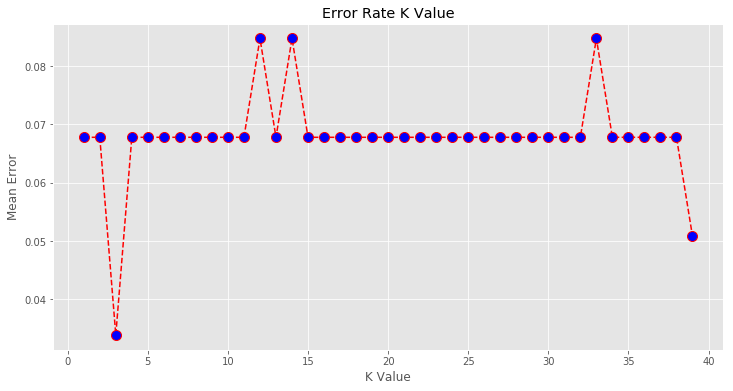

In [43]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  
